# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Definición de hipótesis
#Hipótesis nula = Existe una diferencia significativa entre la pérdida de peso del grupo 1 y 2
#Hipotesis alternativa = No existe una diferencia significativa entre la pérdida de peso del grupo 1 y 2

In [3]:
# Definición de datos
dieta_1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
dieta_2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

In [4]:
# Visualización resultados
print(stats.shapiro(dieta_1)[1])
print(stats.shapiro(dieta_2)[1])

0.9635409177367069
0.5905246580529597


In [5]:
# Definir alpha:
nivel_alpha = 0.05

# Prueba T-student
t_stat, p_valor = stats.ttest_ind(dieta_1, dieta_2)

# Mostrar resultados
print(f'Estadística T: {t_stat}')
print(f'Valor P: {p_valor}')

Estadística T: -3.5383407969933938
Valor P: 0.004083270191713912


In [6]:
# Prueba de la hipótesis
if p_valor < nivel_alpha:
    print('Rechazamos la hipótesis nula')
    print('Existe evidencia de la diferencia significativa entre las pérdidadas de peso de cada uno de los grupos')
else:
    print('No podemos rechazar la hopótesis nula')
    print('No existe una evidencia estadística representativa que muestre una diferencia significativa en la pérdida de peso entre los grupos')

Rechazamos la hipótesis nula
Existe evidencia de la diferencia significativa entre las pérdidadas de peso de cada uno de los grupos


El valor P está por debajo del 0.05, por lo que podemos rechazar la hipótesis nula. Por otro lado, la Estadística T es negativa por lo que indica que la Dieta 1 hizo perder menor peso a los que siguieron esta dieta. En resumen hay una diferencia significativa entre ambas dietas; la Dieta 2 parece tener mayor impacto en la pérdida de peso.

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [43]:
# Definición de datos:

fertilizante1 = np.array([20, 21, 20, 19, 20])
fertilizante2 = np.array([22, 21, 23, 22, 21])
fertilizante3 = np.array([24, 23, 22, 23, 24])

print(stats.shapiro(fertilizante1)[1])
print(stats.shapiro(fertilizante2)[1])
print(stats.shapiro(fertilizante3)[1])


0.32542950716414576
0.3140395561440371
0.3140395561440371


In [44]:
# Definir alpha:
nivel_alpha = 0.05

# prueba ANOVA
f_stats, p_valores = stats.f_oneway(fertilizante1, fertilizante2, fertilizante3)

# Mostrar resultados
print(f'Estadistica F: {f_stats:.4f}')
print(f'Valor P: {p_valores:.4f}')

Estadistica F: 20.3158
Valor P: 0.0001


In [45]:
# Prueba de la hipótesis:
if p_valor < nivel_alpha:
    print('Rechazamos la hipótesis nula')
    print('Hay evidencia estadística significativa de que existe una diferencia en el rendimiento de los fertilizantes')
else:
    print('No podemos rechazar la hopótesis nula')
    print('No hay evidencia estadística sificientemente para afirmar que exista una diferencia en el rendimiento de los fertilizantes')

Rechazamos la hipótesis nula
Hay evidencia estadística significativa de que existe una diferencia en el rendimiento de los fertilizantes


Búsqueda del mejor fertilizante

In [46]:
# Definición de datos

fertilizante1 = np.array([20, 21, 20, 19, 20])
fertilizante2 = np.array([22, 21, 23, 22, 21])
fertilizante3 = np.array([24, 23, 22, 23, 24])

rendimiento = np.concatenate([fertilizante1,fertilizante2,fertilizante3])
grupos = np.array(['F1']*5 + ['F2']*5 + ['F3']*5)

# Prueba Anova:
f_stat, p_valor = stats.f_oneway(fertilizante1,fertilizante2,fertilizante3)

# Mostrar resultados:
print(f'Estadistica F: {f_stat:.4f}')
print(f'Valor P: {p_valor:.4f}')

Estadistica F: 20.3158
Valor P: 0.0001


In [47]:
# Prueba de la hipótesis

if p_valor < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=rendimiento, groups=grupos, alpha=0.05)
    print(tukey_results)
else:
    print("No se puede rechazar la hipótesis nula; no hay evidencia suficiente para afirmar que hay diferencias notables en los diferentes fertilizantes")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


In [48]:
# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Crear DataFrame
df = pd.DataFrame({
    'Rendimiento': np.concatenate([fertilizante1, fertilizante2, fertilizante3]),
    'Fertilizante': ['F1'] * len(fertilizante1) + ['F2'] * len(fertilizante2) + ['F3'] * len(fertilizante3)
})

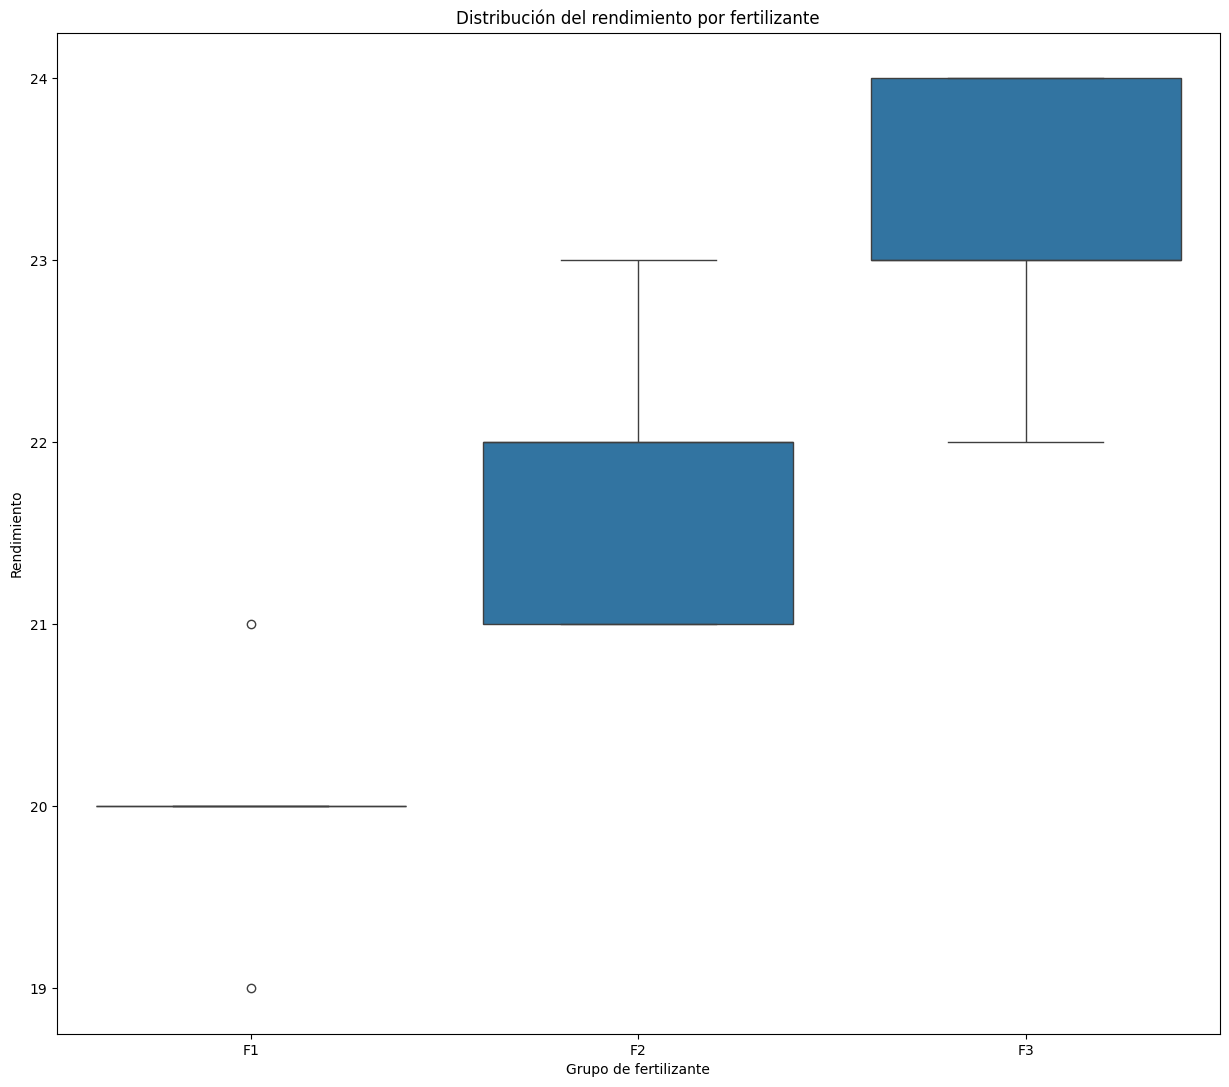

In [50]:
# Configurar gráfico
plt.figure(figsize=(15,13))
sns.boxplot(x="Fertilizante", y="Rendimiento", data=df)
plt.title("Distribución del rendimiento por fertilizante")
plt.xlabel("Grupo de fertilizante")
plt.ylabel("Rendimiento")
plt.show()

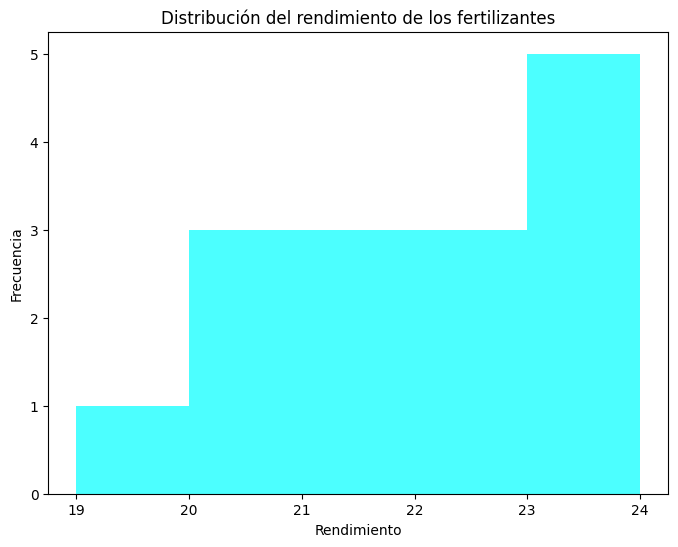

In [51]:
# Configurar histograma
plt.figure(figsize=(8, 6))
plt.hist(rendimiento, bins=5, color="#00FFFF", alpha=0.7)
plt.title("Distribución del rendimiento de los fertilizantes")
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.show()

Concluímos que se puede rechazar la hipótesis nula y, por lo tanto, se concluye que hay diferencia significativas en el rendimiento entre los fertilizantes.
El histograma muestra una distribución sesgada a la izquierda. Éste muestra el rendimiento más alto (24 kg) con la mayor frecuencia. Así, uno de los fertilizantes podría estar generando un mejor rendimiento.
Así, el análisis visual refuerza la necesidad de realizar pruebas adicionales para confirmar la mejor opción para mejorar la producción.